# Fashion MNIST

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import fashion_mnist

En esta parte se carga el DataSet Fashion MNIST, que contiene imágenes con 10 clases diferentes. Luego, se normalizan los valores de píxeles para que estén en el rango [0, 1].

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255

## Validación de datos

In [ ]:
class_names = ['playera', 'pantalon', 'sueter', 'vestido', 'abrigo', 'zapatilla', 'camisa', 'tenis', 'bolsa', 'bota']

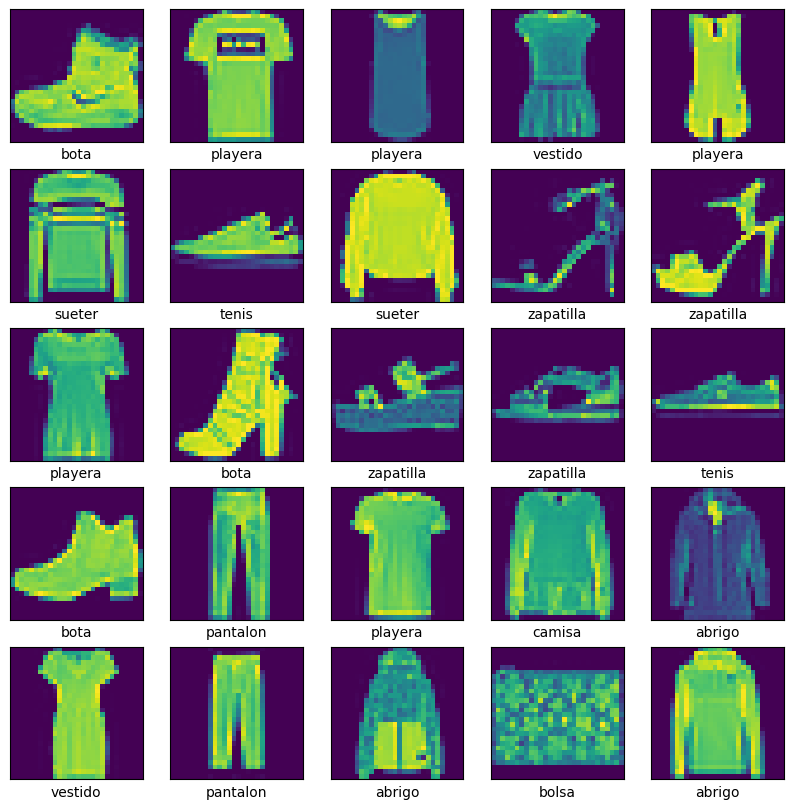

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## Arquitectura

In [ ]:
model = keras.Sequential([layers.Flatten(input_shape=(28, 28)), layers.Dense(128, activation='relu'), layers.Dense(10, activation='softmax') ])

En esta parte se define la arquitectura de la red neuronal utilizando Keras Sequential. La red consta de tres capas, una capa Flatten para convertir las imágenes 2D en un vector 1D, una capa densa con 128 neuronas y activación ReLU, y una capa de salida con 10 neuronas y activación softmax.

## Entrenamiento

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Se compila el modelo utilizando el optimizador 'adam' y la función de pérdida 'sparse_categorical_crossentropy'.

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5206 - accuracy: 0.8180 - val_loss: 0.4206 - val_accuracy: 0.8491
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3887 - accuracy: 0.8608 - val_loss: 0.3768 - val_accuracy: 0.8668
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3474 - accuracy: 0.8744 - val_loss: 0.3802 - val_accuracy: 0.8618
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3204 - accuracy: 0.8824 - val_loss: 0.3590 - val_accuracy: 0.8718
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3038 - accuracy: 0.8875 - val_loss: 0.3329 - val_accuracy: 0.8787
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2855 - accuracy: 0.8940 - val_loss: 0.3336 - val_accuracy: 0.8789
Epoch 7/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.2730 - accuracy: 0.8990 - val_loss: 0.3151 - val_accur

Se entrena el modelo utilizando el conjunto de entrenamiento, dividiendo el 20% de los datos para validación durante 10 épocas.

## Evaluación de rendimiento

(0.5, 1.0)

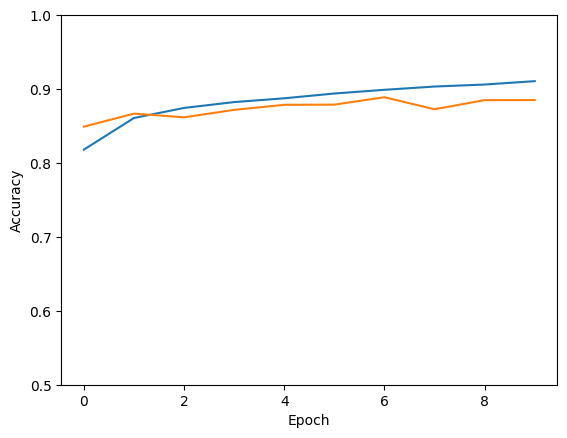

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])

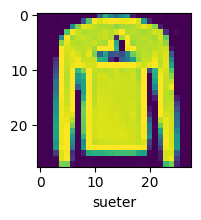

In [ ]:
n = 115
plt.figure(figsize=(2,2))
plt.imshow(test_images[n])
plt.xlabel(class_names[test_labels[n]])
plt.show()

In [ ]:
predictions = model.predict(test_images)
print(predictions[n])

313/313 [==============================] - 1s 2ms/step
[1.6316025e-04 8.9293297e-13 9.9941051e-01 3.0826250e-08 4.0056845e-04
 2.1326238e-14 2.5695785e-05 2.1950986e-13 3.1853055e-11 7.8975905e-13]


In [ ]:
print("La imagen pertenece al grupo {} con una probabilidad de {:.2f} %".format(class_names[np.argmax(predictions[n])], 100 * np.max(predictions[n])))

La imagen pertenece al grupo sueter con una probabilidad de 99.94 %
